In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

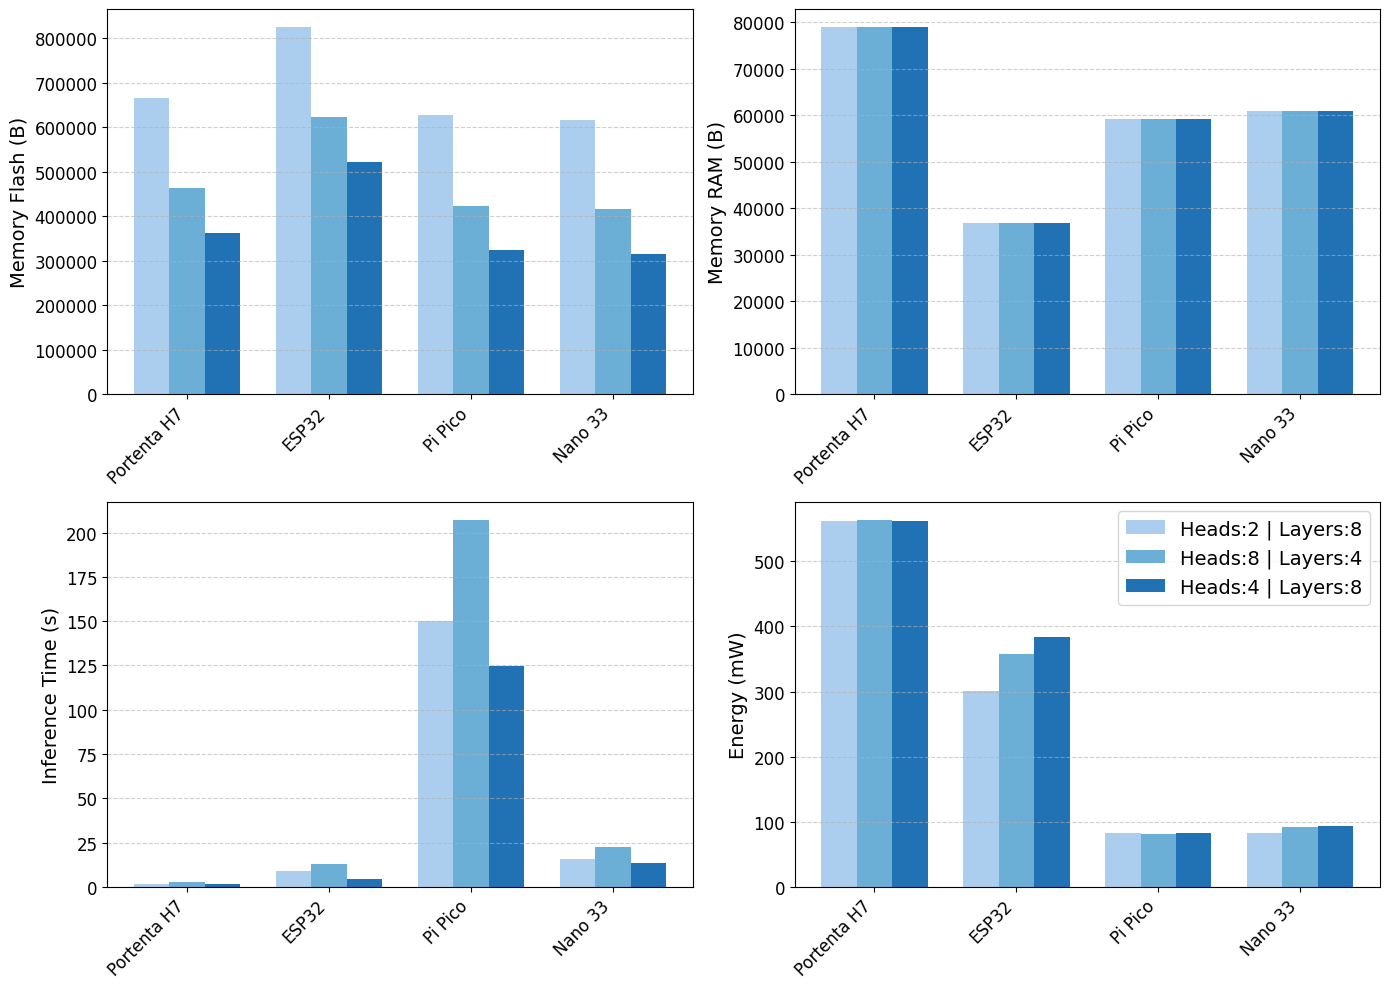

In [2]:
data = {
    "Configuration": ["Heads:2 | Layers:8"]*4 + ["Heads:8 | Layers:4"]*4 + ["Heads:4 | Layers:8"]*4,
    "Board": [
        "Portenta H7", "ESP32", "Pi Pico", "Nano 33",
        "Portenta H7", "ESP32", "Pi Pico", "Nano 33",
        "Portenta H7", "ESP32", "Pi Pico", "Nano 33"
    ],
    "Memory Flash (B)": [
        665848, 824014, 626107, 616848,
        464120, 622278, 423833, 415120,
        363256, 521386, 322965, 314256
    ],
    "Memory RAM (B)": [
        78904, 36900, 59220, 60944,
        78904, 36900, 59220, 60944,
        78904, 36900, 59220, 60944
    ],
    "Inference Time (s)": [
        1.8, 9.0, 149.82, 15.55,
        2.5, 12.78, 207.22, 22.53,
        1.49, 4.38, 124.45, 13.47
    ],
    "Energy (mW)": [
        561.88, 300.35, 81.93, 82.08,
        563.88, 358.42, 81.90, 91.28,
        561.37, 383.94, 82.72, 94.19
    ]
}

df = pd.DataFrame(data)

metrics = ["Memory Flash (B)", "Memory RAM (B)", "Inference Time (s)", "Energy (mW)"]
colors = ["#acceee", "#6baed6", "#2171b5"]
x = np.arange(len(df["Board"].unique()))
width = 0.25

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=False)

for idx, metric in enumerate(metrics):
    ax = axs[idx // 2][idx % 2]
    for i, config in enumerate(["Heads:2 | Layers:8", "Heads:8 | Layers:4", "Heads:4 | Layers:8"]):
        values = df[df["Configuration"] == config][metric].values
        ax.bar(x + i * width - width, values, width=width, label=f"{config}", color=colors[i])
    
    ax.set_xticks(x)
    ax.set_xticklabels(df["Board"].unique(), rotation=45, ha='right', fontsize=12)
    ax.set_ylabel(metric, fontsize=14)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# Legenda no subplot inferior direito
handles, labels = axs[0][0].get_legend_handles_labels()
axs[1][1].legend(handles, labels, fontsize=14)

plt.tight_layout()
plt.savefig("hardware_performance_barplots_2x2.pdf")
plt.show()
